# Boston House Price

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('Boston Dataset.csv')
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#checking the statistical info
df.describe()
#it's clear from the 'count' row that there are no missing values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


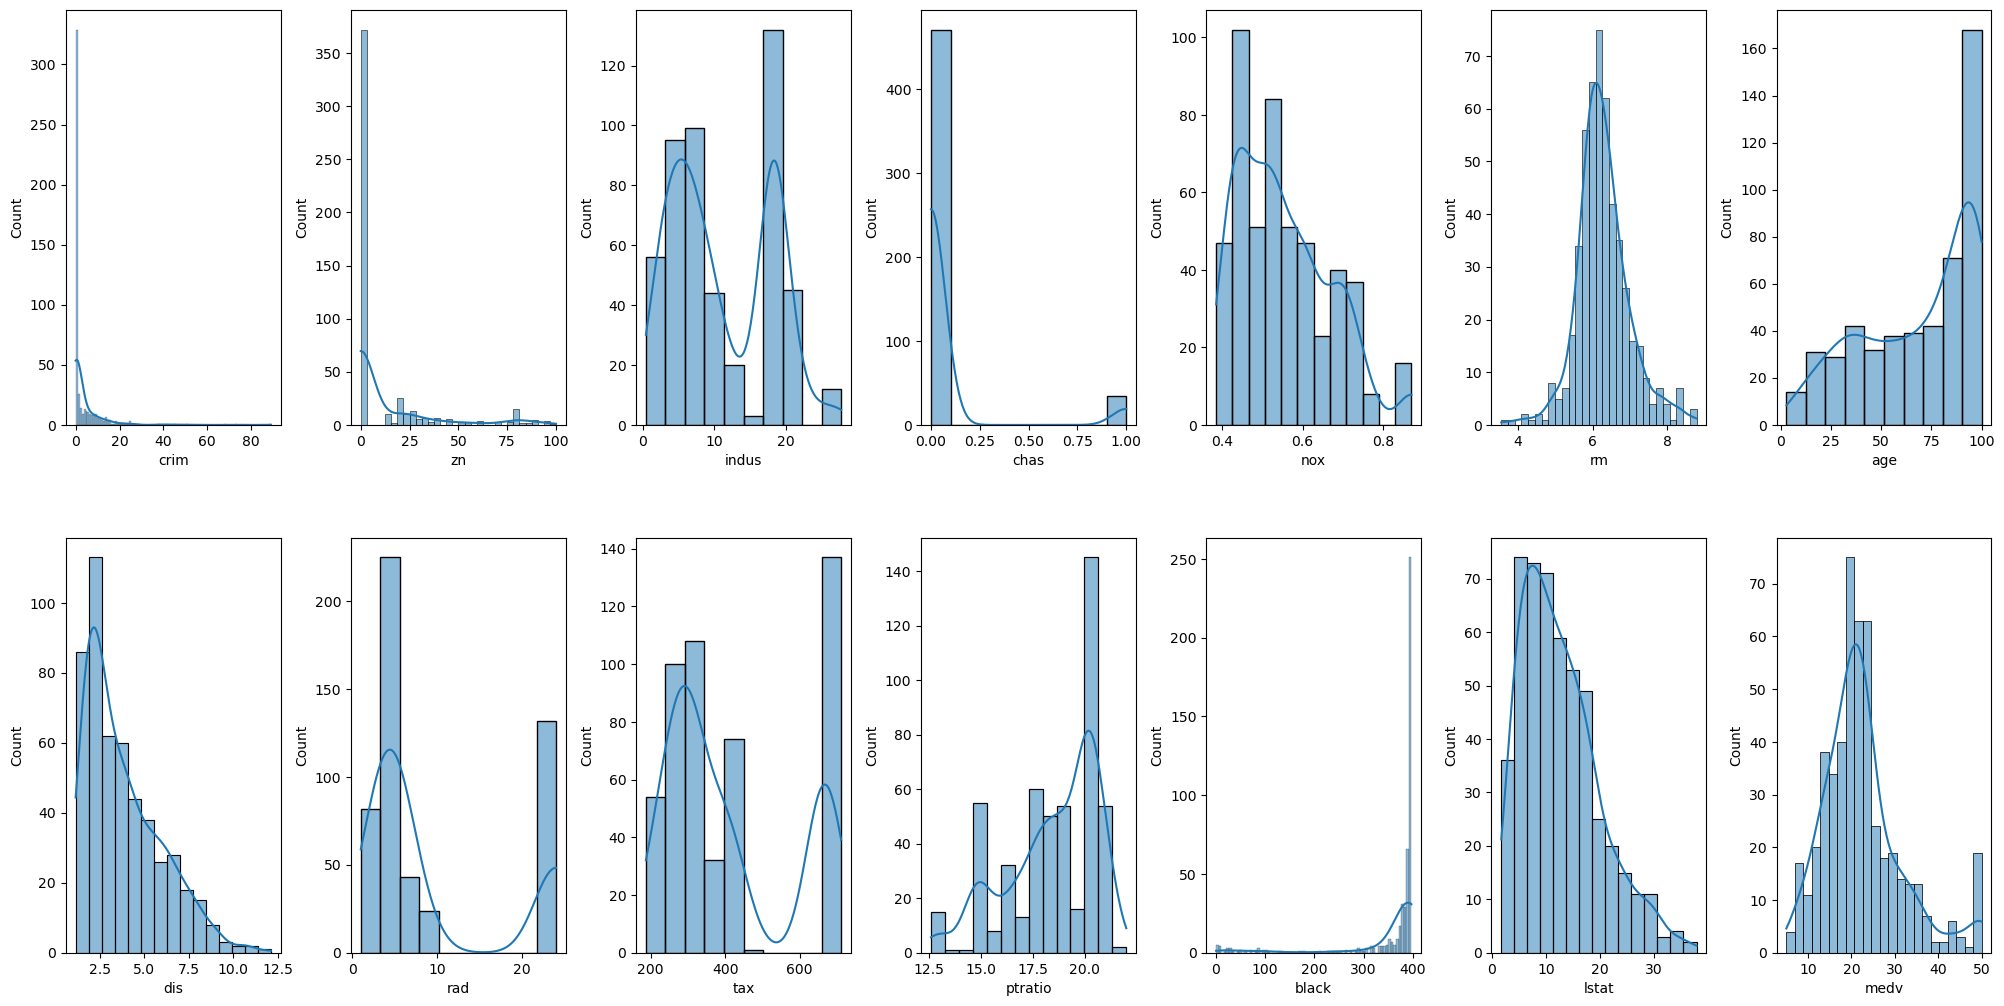

In [5]:
#creating a histplot
fig, ax= plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value,ax=ax[index], kde=True)
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

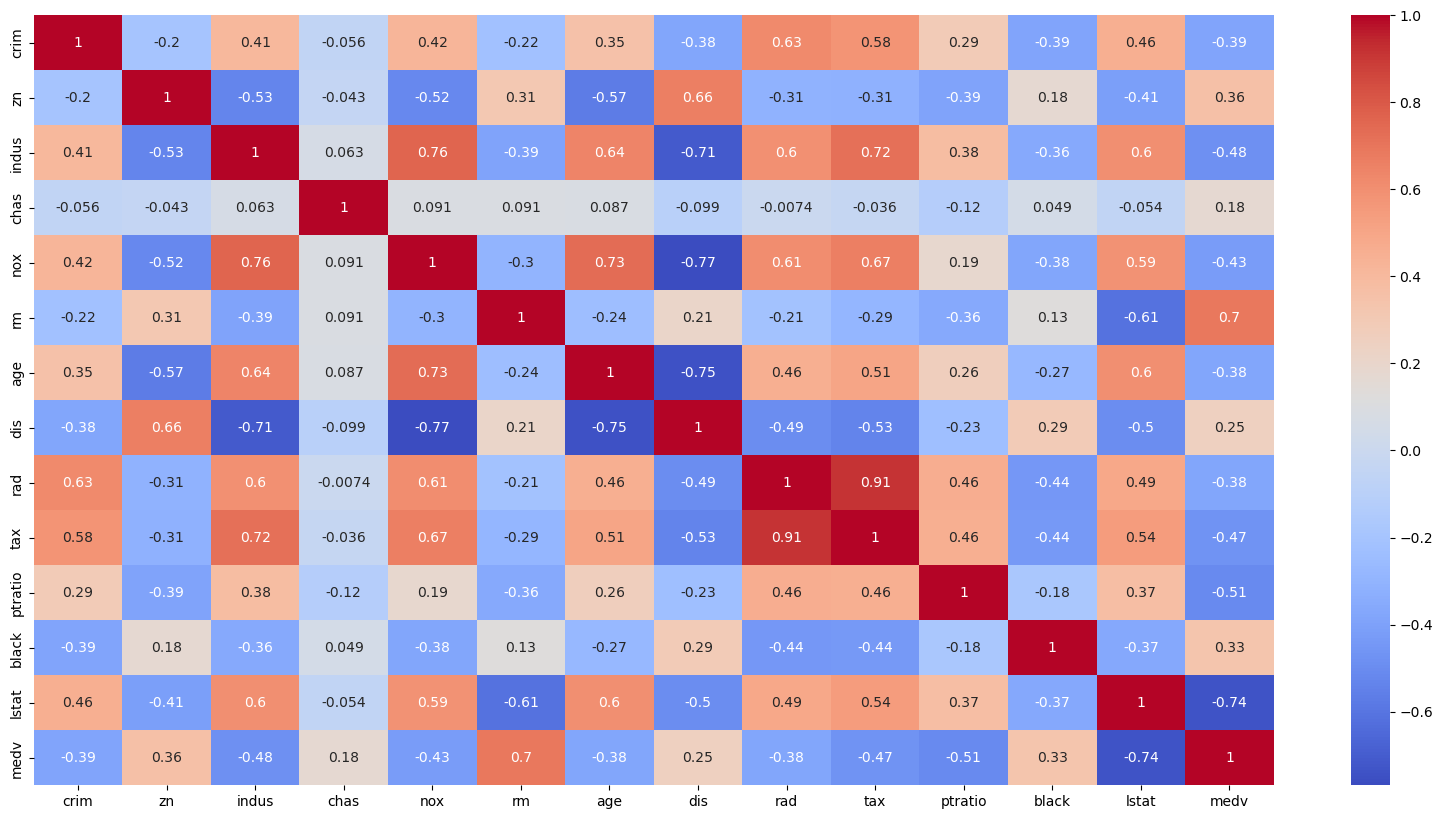

In [6]:
#Heatmap
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

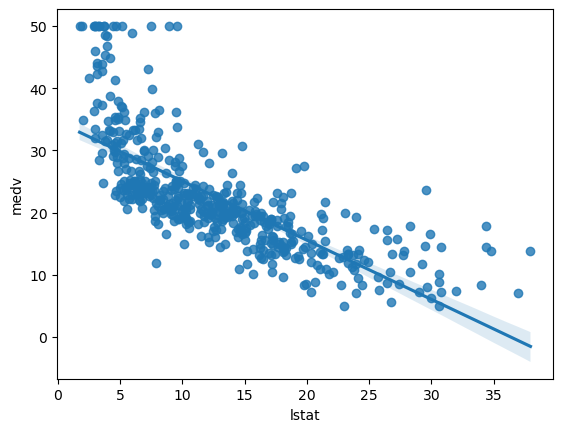

In [7]:
sns.regplot(y=df['medv'], x =df['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

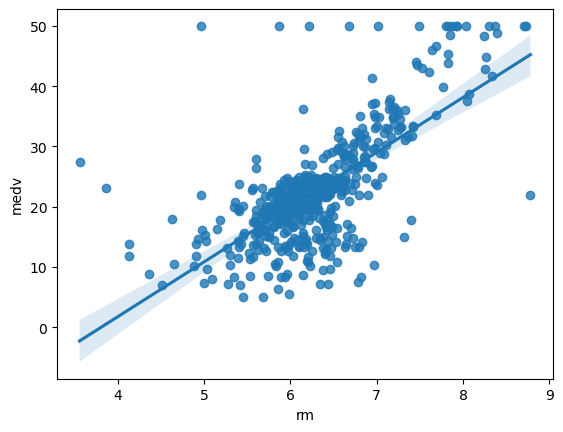

In [8]:
sns.regplot(y=df['medv'], x =df['rm'])

In [9]:
#Spliting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['medv'])
y = df['medv']

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
def train(model, X, y):
    #standardizing the features and fit the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled,y_train)
    
    #predict the training set
    pred =  model.predict(X_test_scaled)
    
    #performing cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
      
    print('Model Report')
    print('MSE:', mean_squared_error(y_test, pred))
    print('CV_SCORE:',cv_score)

Model Report
MSE: 21.89776539604951
CV_SCORE: 37.131807467699154


<Axes: title={'center': 'Model coefficient'}>

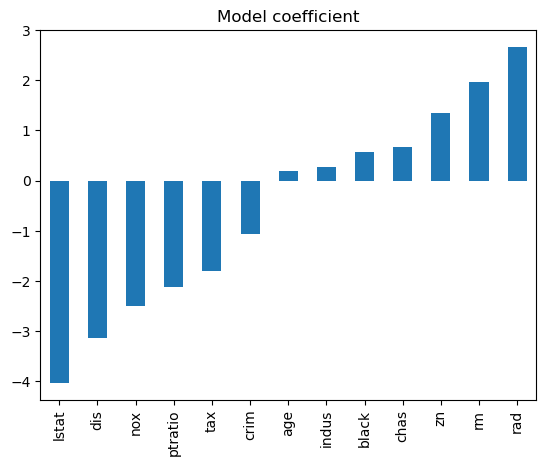

In [27]:
#Linear regression

from sklearn.linear_model import LinearRegression
le = LinearRegression()
train(le, X, y)

coef = pd.Series(le.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model coefficient')

Model Report
MSE: 19.110393700787398
CV_SCORE: 39.56094370025238


<Axes: title={'center': 'Feature Importances'}>

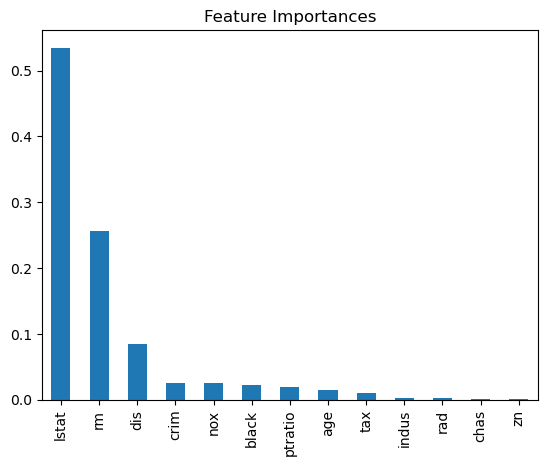

In [28]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
Dt = DecisionTreeRegressor()
train(Dt, X, y)
coef = pd.Series(Dt.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind = 'bar', title = 'Feature Importances')

Model Report
MSE: 8.866823543307083
CV_SCORE: 21.768163275286344


<Axes: title={'center': 'Feature Importances'}>

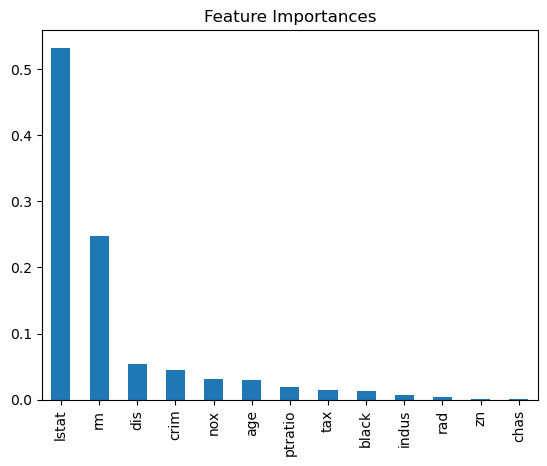

In [30]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
train(Rf, X, y)
coef = pd.Series(Rf.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind = 'bar', title = 'Feature Importances')

Model Report
MSE: 8.1084956929134
CV_SCORE: 20.33639464408851


<Axes: title={'center': 'Feature Importances'}>

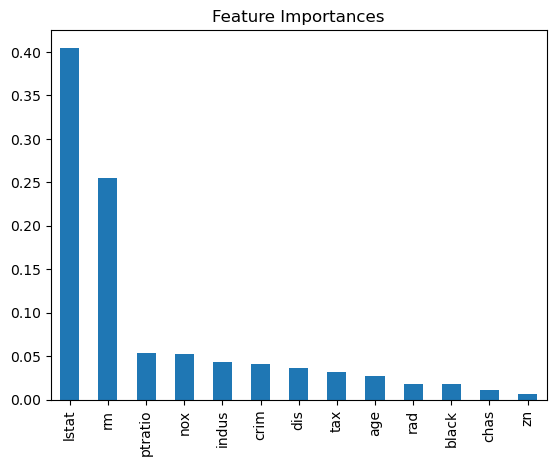

In [31]:
#ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
Et = ExtraTreesRegressor()
train(Et, X, y)
coef = pd.Series(Et.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind = 'bar', title = 'Feature Importances')